<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/Latent_Semantic_Analysis_CountVectorizer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt

File ‘all_book_titles.txt’ already there; not retrieving.



In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
# great example of domain-specific stopwords
stops = stops.union({
  'introduction', 'edition', 'series', 'application',
  'approach', 'card', 'access', 'package', 'plus', 'etext',
  'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
  'third', 'second', 'fourth', 'volume'})

In [ ]:
def my_tokenizer(s):
  # downcase
  s = s.lower()

  # split string into words (tokens)
  tokens = nltk.tokenize.word_tokenize(s)

  # remove short words, they're probably not useful
  tokens = [t for t in tokens if len(t) > 2]

  # put words into base form
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

  # remove stopwords
  tokens = [t for t in tokens if t not in stops]

  # remove any digits, i.e. "3rd edition"
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]

  return tokens

In [ ]:
vectorizer = CountVectorizer(binary=True, tokenizer=my_tokenizer)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
X = vectorizer.fit_transform(titles)

In [ ]:
# create index > word map for plotting later

# conceptually what we want to do
# index_word_map = [None] * len(vectorizer.vocabulary_)
# for word, index in vectorizer.vocabulary_.items():
#   index_word_map[index] = word

# but it's already stored in the count vectorizer
index_word_map = vectorizer.get_feature_names_out()

In [ ]:
# transpose X to make rows = terms, cols = documents
X = X.T

In [ ]:
svd = TruncatedSVD()
Z = svd.fit_transform(X)

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x=Z[:,0], y=Z[:,1], text=index_word_map, size_max=60)
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
Z[:,0]

array([0.00058893, 0.02061066, 0.00127798, ..., 0.00334903, 0.00860738,
       0.00114865])

In [ ]:
Z[:,1]

array([ 1.76027949e-03,  7.16715392e-04, -5.72351413e-05, ...,
        5.77343027e-03,  6.74037014e-03,  3.03312249e-03])

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_obj = TruncatedSVD(n_components=10, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(X)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

In [ ]:
V_T.shape[1]

10

In [ ]:
tfidf_lsa_data

array([[ 6.07254623e-04,  1.77180058e-03, -4.96061413e-04, ...,
        -9.30417422e-05,  6.14756160e-04, -3.60846863e-04],
       [ 1.94454838e-02, -8.00107862e-04, -9.34616106e-02, ...,
        -2.53851428e-02, -2.49642848e-02,  3.70311538e-02],
       [ 1.23454562e-03, -1.93703826e-05, -1.21255450e-03, ...,
        -9.08101937e-04, -1.10152205e-03,  4.39134383e-06],
       ...,
       [ 3.39403299e-03,  6.09246738e-03, -4.63142433e-03, ...,
        -5.57368656e-03, -3.22265486e-03, -1.91838411e-03],
       [ 8.42960778e-03,  6.62439296e-03, -2.24694158e-02, ...,
        -1.77753289e-02,  7.60800905e-02, -2.17472139e-02],
       [ 1.16883750e-03,  3.21877057e-03, -1.52100948e-03, ...,
        -1.93381194e-03, -3.43228854e-04, -1.85350251e-04]])

In [ ]:
Sigma

array([14.02264352, 13.10964507, 11.42386105, 11.00918574, 10.69765755,
       10.27869349, 10.14584827, 10.04753413,  9.85536773,  9.68925204])

In [ ]:
lsa_obj.components_.T

array([[ 0.00158485,  0.00245589, -0.00225774, ..., -0.00143083,
         0.00231593, -0.00074665],
       [ 0.00255617,  0.00555634, -0.00276474, ..., -0.00429901,
         0.0002623 , -0.00061014],
       [ 0.00452732, -0.00061265, -0.01905754, ..., -0.00450016,
         0.00056066, -0.00310847],
       ...,
       [ 0.01126655, -0.0001916 , -0.03592536, ...,  0.04127841,
        -0.01259833,  0.07932969],
       [ 0.01159294, -0.00042097, -0.0573569 , ..., -0.04617283,
         0.08431954, -0.02593961],
       [ 0.01092108,  0.00061908, -0.00131232, ...,  0.00509603,
        -0.00211385, -0.00249202]])

In [ ]:
import seaborn as sns

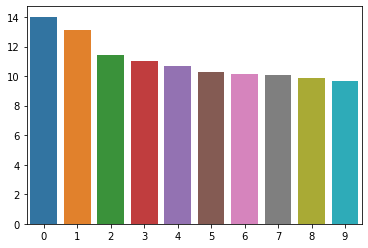

In [ ]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)


In [ ]:
#sns.barplot(x=list(range(len(lsa_obj.components_))), y = lsa_obj.components_)

In [ ]:
import pandas as pd
term_topic_matrix = pd.DataFrame(data=tfidf_lsa_data, 
                                 index = index_word_map,
                                 columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])])

In [ ]:
term_topic_matrix 


,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
'the,0.000607,0.001772,-0.000496,0.000078,0.001142,-0.000213,0.000655,-0.000093,0.000615,-0.000361
...,0.019445,-0.000800,-0.093462,-0.024419,-0.087691,0.019017,0.049928,-0.025385,-0.024964,0.037031
a-z,0.001235,-0.000019,-0.001213,0.000800,-0.000045,0.001979,0.001936,-0.000908,-0.001102,0.000004
abbas,0.008958,-0.001313,-0.008230,0.024680,0.000687,0.026387,-0.000041,0.016024,0.003326,-0.008462
abnormal,0.023946,0.010227,-0.005442,0.015229,0.018659,-0.008882,-0.005663,-0.013819,0.014691,0.008192
...,...,...,...,...,...,...,...,...,...,...
young,0.012012,0.005710,-0.009380,0.012516,0.013875,0.013128,0.006170,-0.008545,-0.006280,-0.009147
youth,0.011095,0.011337,-0.018606,0.000803,-0.009148,-0.000114,0.048476,-0.023372,0.018154,0.007777
zen,0.003394,0.006092,-0.004631,0.002483,0.004276,0.000779,0.004229,-0.005574,-0.003223,-0.001918
zionism,0.008430,0.006624,-0.022469,-0.004138,0.007128,-0.000314,-0.013166,-0.017775,0.076080,-0.021747


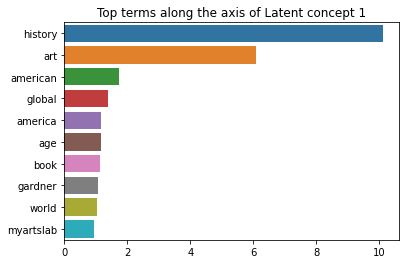

In [ ]:
data = term_topic_matrix[f'Latent_concept_1']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 1')
fig = sns.barplot(x=  data[:10].values, y=top_10.index)


In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

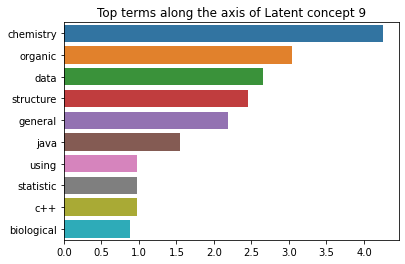

In [ ]:
data = term_topic_matrix[f'Latent_concept_9']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 9')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
fig = px.scatter(x=Z[:,0], y=Z[:,1], text=index_word_map, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

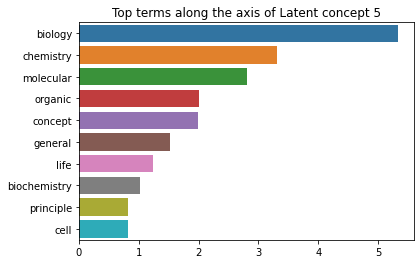

In [ ]:
data = term_topic_matrix[f'Latent_concept_5']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 5')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

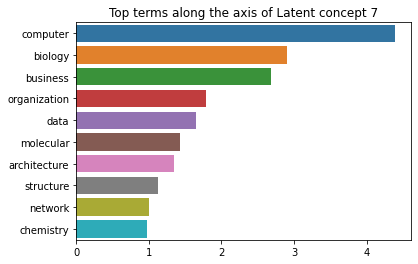

In [ ]:
data = term_topic_matrix[f'Latent_concept_7']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 7')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

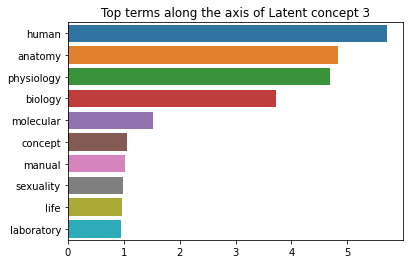

In [ ]:
data = term_topic_matrix[f'Latent_concept_3']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 3')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

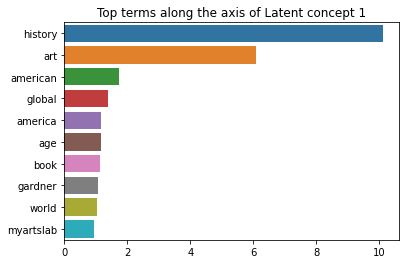

In [ ]:
data = term_topic_matrix[f'Latent_concept_1']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 1')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

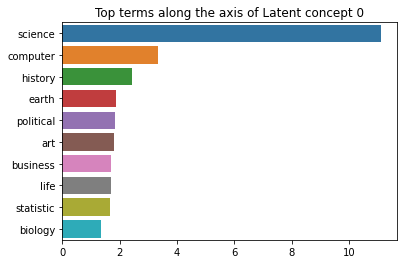

In [ ]:
data = term_topic_matrix[f'Latent_concept_0']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 0')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

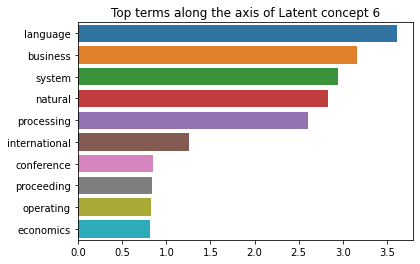

In [ ]:
data = term_topic_matrix[f'Latent_concept_6']
data = data.sort_values(ascending=False)
top_10 = data[:10]
plt.title('Top terms along the axis of Latent concept 6')
fig = sns.barplot(x= top_10.values, y=top_10.index)

In [ ]:
fig = px.scatter(x= top_10.values, y=top_10.index, text=top_10.index, size_max=25)
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
X = vectorizer.fit_transform(titles)

In [ ]:
nmf = NMF(
    n_components=10, # default: 10
    beta_loss="kullback-leibler",
    solver='mu',
    # alpha_W=0.1,
    # alpha_H=0.1,
    # l1_ratio=0.5,
    random_state=0,
)
nmf.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [ ]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

In [ ]:
 for topic_idx, topic in enumerate(nmf.components_):
  x= topic.argsort()[: -10 - 1 : -1]
  weights = topic[x]

In [ ]:
x

array([ 304,  481,  804, 1367, 1016, 1849, 1519,  656,  530,   67])

In [ ]:
  weights 


array([1.74893743, 1.08182423, 0.98321093, 0.98321093, 0.92379022,
       0.84942498, 0.71253562, 0.69090498, 0.66283346, 0.63775819])

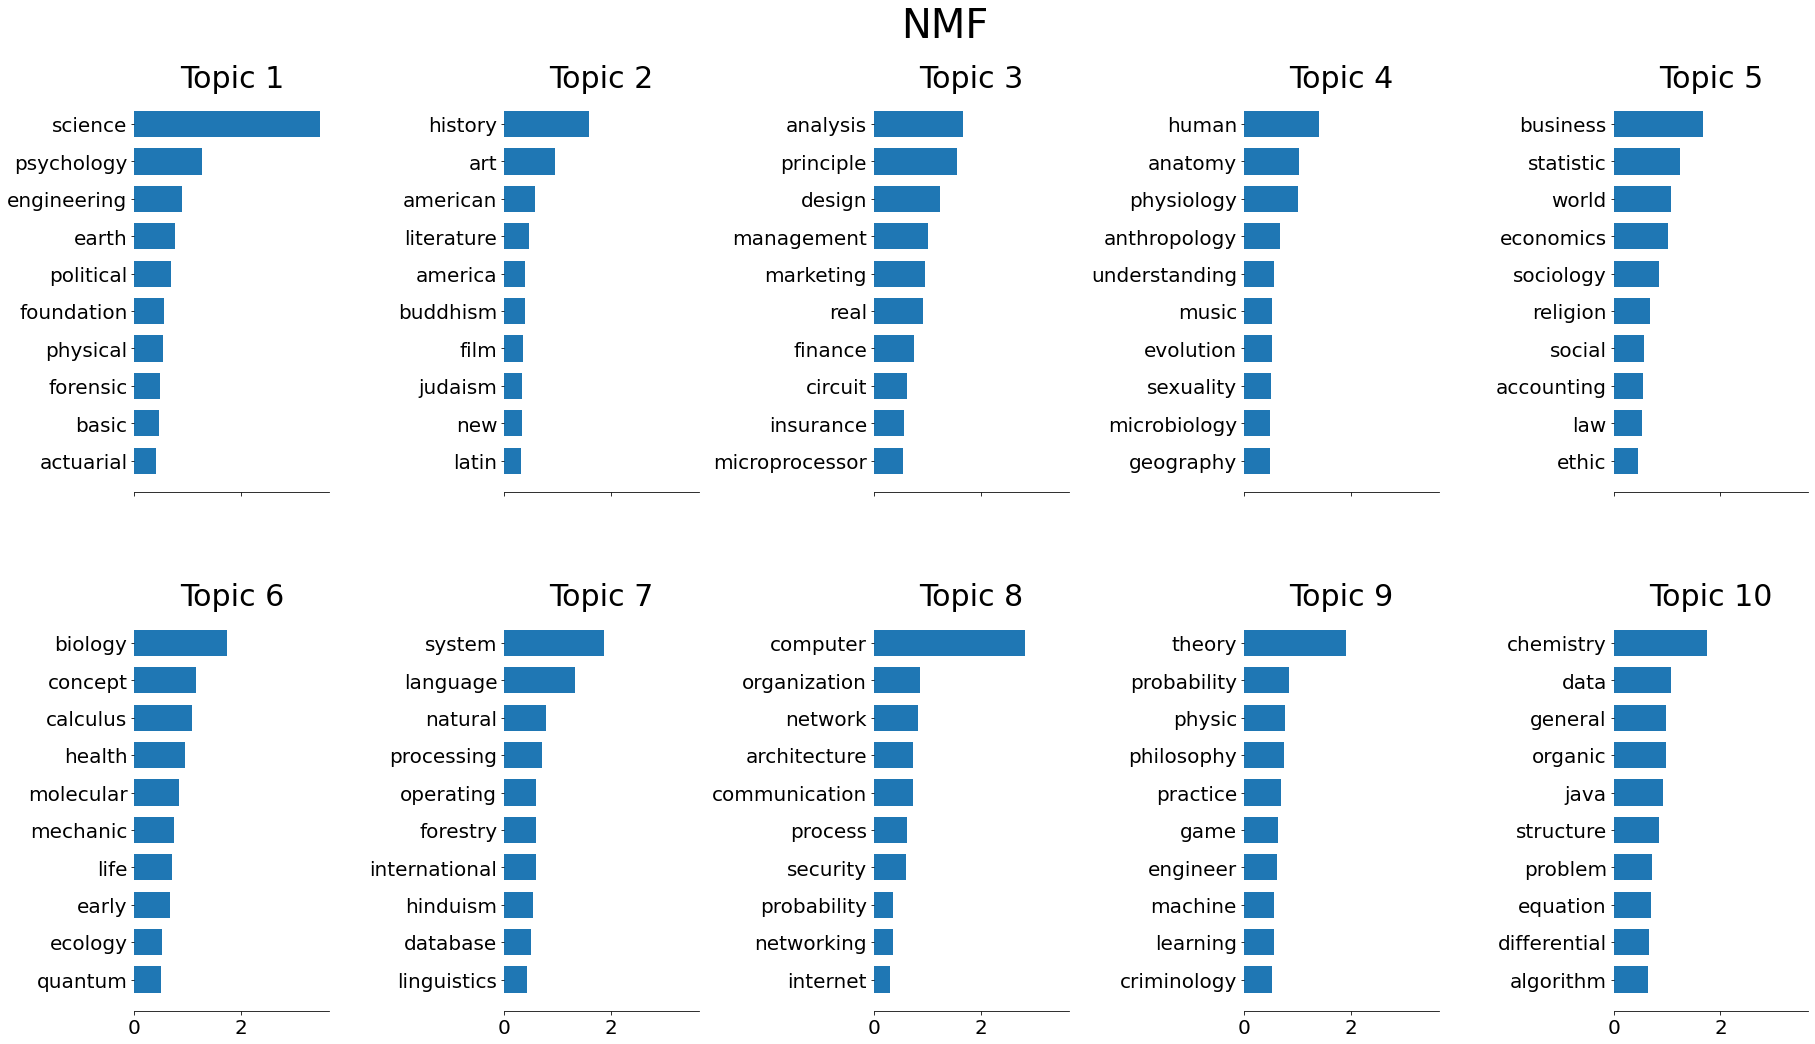

In [ ]:
index_word_map = vectorizer.get_feature_names_out()
plot_top_words(nmf, index_word_map);

In [ ]:
X = vectorizer.fit_transform(titles)

In [ ]:
index_word_map = vectorizer.get_feature_names_out()

In [ ]:
nmf = NMF(
    n_components=10, # default: 10
    beta_loss="kullback-leibler",
    solver='mu',
    # alpha_W=0.1,
    # alpha_H=0.1,
    # l1_ratio=0.5,
    random_state=0,
)
nmf.fit(X)
tfidf_lsa_data=nmf.transform(X)
V_T = lsa_obj.components_.T

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [ ]:
def plot_top_words(model, feature_names, n_top_words=5):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i  in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

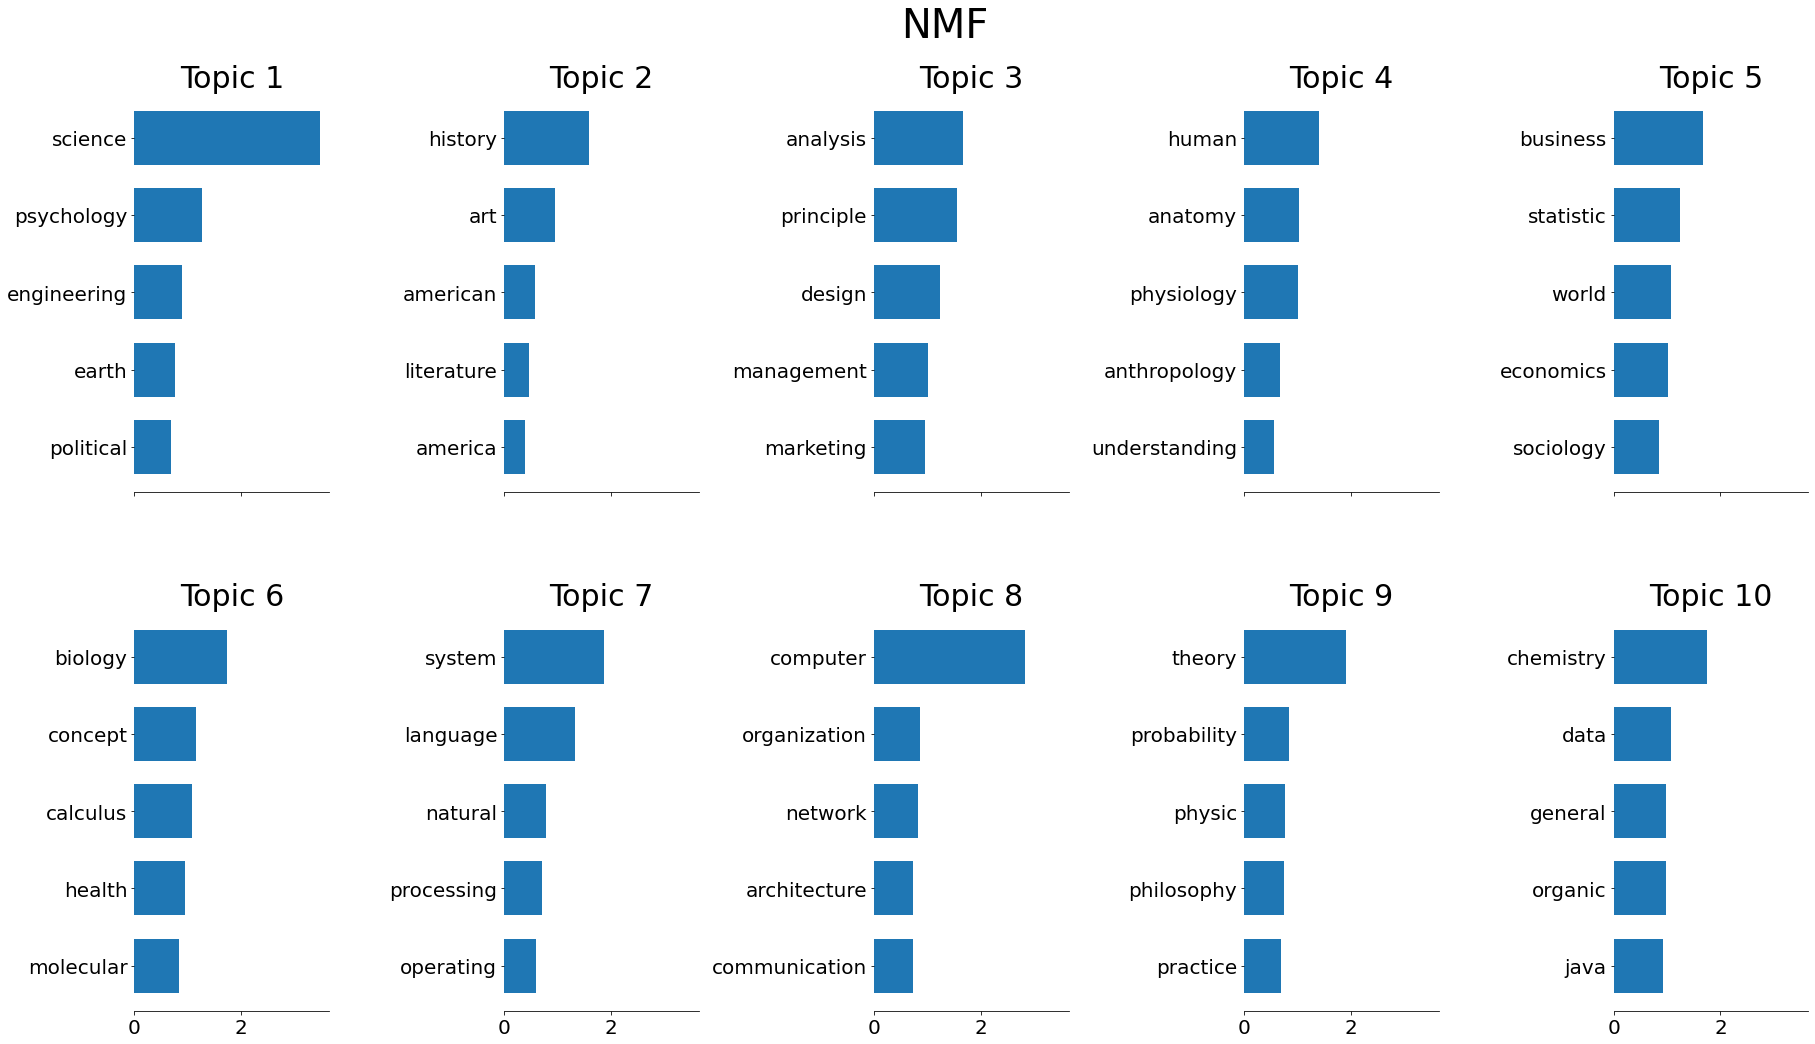

In [ ]:
index_word_map = vectorizer.get_feature_names_out()
plot_top_words(nmf, index_word_map);